In [ ]:
import pandas as pd
from google.colab import drive
import nltk
import random
import numpy as np
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
drive.mount('/content/drive')
nltk.download('wordnet')
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
import seaborn as sns
import re
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
import enchant


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Reading Posts file

In [ ]:
posts_data=pd.read_csv("/content/drive/MyDrive/FinalProject/Top_Posts.csv",encoding='latin-1')
posts_data.head(5)

post_id                                         post_title        subreddit  \
0  gh1dj9  [Project] From books to presentations in 10s w...  MachineLearning   
1  kuc6tz  [D] A Demo from 1993 of 32-year-old Yann LeCun...  MachineLearning   
2  g7nfvb  [R] First Order Motion Model applied to animat...  MachineLearning   
3  lui92h  [N] AI can turn old photos into moving Images ...  MachineLearning   
4  ohxnts  [D] This AI reveals how much time politicians ...  MachineLearning   

                              post_url  flair_text  score  comments  \
0      https://v.redd.it/v492uoheuxx41     Project   7798       186   
1      https://v.redd.it/25nxi9ojfha61  Discussion   5851       133   
2      https://v.redd.it/rlmmjm1q5wu41    Research   4761       111   
3      https://v.redd.it/ikd5gjlbi8k61        News   4688       230   
4  https://i.redd.it/34sgziebfia71.jpg  Discussion   4568       228   

   upvote_ratio            date-time  year  
0          0.99  2020-05-10 13:19:54  2020  
1          0.98  2021-01-10 10:30:36  2021  
2          0.97  2020-04-25 04:27:23  2020  
3          0.97  2021-02-28 15:12:28  2021  
4          0.96  2021-07-11 04:18:59  2021

In [ ]:
posts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2987 entries, 0 to 2986
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   post_id       2987 non-null   object 
 1   post_title    2987 non-null   object 
 2   subreddit     2987 non-null   object 
 3   post_url      2987 non-null   object 
 4   flair_text    2441 non-null   object 
 5   score         2987 non-null   int64  
 6   comments      2987 non-null   int64  
 7   upvote_ratio  2987 non-null   float64
 8   date-time     2987 non-null   object 
 9   year          2987 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 233.5+ KB


# Reading Comments file

In [ ]:
comment_data=pd.read_csv("/content/drive/MyDrive/FinalProject/Top_Posts_Comments.csv",encoding='latin-1')
comment_data.head(5)

post_id                                            comment
0  gh1dj9  Twitter thread: [https://twitter.com/cyrildiag...
1  gh1dj9                                    The future ð¤¯
2  gh1dj9  Simple yet very useful. Thank you for sharing ...
3  gh1dj9  Almost guaranteed, Apple will copy your idea i...
4  gh1dj9  Ohh the nightmare of making this into a stable...

In [ ]:
comment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223174 entries, 0 to 223173
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   post_id  223174 non-null  object
 1   comment  223159 non-null  object
dtypes: object(2)
memory usage: 3.4+ MB


Checking for null rows

In [ ]:
comment_data["comment"].isnull().sum()

15

Dropping the null values

In [ ]:
comment_data = comment_data.dropna()
comment_data["comment"].isnull().sum()


0

In [ ]:
print(posts_data.shape)
print(comment_data.shape)

(2987, 10)
(223159, 2)


Stopwords taken for preprocessing

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words = stop_words.union(["wa", "gt","amp", "u", "ha", "le", "doe", "don",'ve','make','get'])
print(stop_words)

{'s', 'before', "she's", "haven't", 'during', 'all', 'again', 'isn', 'le', 'when', 'she', 'be', 'him', 'a', 'because', "you've", 'are', 'than', 'most', 'ma', 'yourselves', 'down', 'only', 'so', 'no', 're', 'couldn', "needn't", 'as', 'haven', 'too', "should've", 'under', 'your', "wasn't", 'each', 'you', 'wouldn', 'like', "you're", 'on', 'their', 'against', 'to', 'doe', 'yours', "wouldn't", 'was', 'very', 'other', 't', 'themselves', 'few', 'with', "that'll", 'until', 'then', 'doesn', "hasn't", 'into', 'between', 'had', 'ain', 'but', 'did', 'hasn', 'through', 'our', 'nor', 'much', 'has', 'off', 'having', 'it', 'its', "weren't", 'about', 'will', "hadn't", 'that', 'which', 'or', 'get', 'these', 'more', 'for', 'been', 'can', 'were', 'mightn', 'didn', 'herself', 'just', "it's", 'himself', "mightn't", 'i', 'if', "don't", 'such', 'm', 'mustn', 'o', 'over', 'at', 'up', 'we', "doesn't", 'ours', 'he', 'shouldn', "aren't", 'not', 'here', 'me', 'after', 'out', 'am', 'further', 'the', 'being', "mustn

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
comment_data['comment'].head(10)

0    Twitter thread: [https://twitter.com/cyrildiag...
1                                      The future ð¤¯
2    Simple yet very useful. Thank you for sharing ...
3    Almost guaranteed, Apple will copy your idea i...
4    Ohh the nightmare of making this into a stable...
5                    Wtffff. Well that was incredible.
6    Apple canât wait to steal this and not credi...
7                                           fantastic!
8          Why did the boxes in the diagram turn gray?
9    How does the Algorithm decide what it cuts out...
Name: comment, dtype: object

Preprocessing the comments data before classification

In [ ]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocessing_data(comment):
  comment = comment.lower()
  comment = re.sub(r"\xa0",r" ",comment)
  comment = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ', comment)   
  comment = re.sub(r'\n','',comment)
  comment = re.sub(r'http\S+', '', comment)
  comment = re.sub(r'[0-9]+', ' ', comment)
  comment = re.sub(r"[^A-Za-z0-9!?\'\`]", " ", comment)
  comment= re.sub(r"\b[a-zA-Z]\b","", comment)

  comment = [word for word in comment.split() if not word in stop_words]
  comment = ' '.join(comment)
  comment = [lemmatizer.lemmatize(word) for word in comment.split()]
  comment = ' '.join(comment)
  comment = comment.split()
  comment = [stemmer.stem(word) for word in comment]
  comment = ' '.join(comment)

  return comment
  
comment_data['comment'] = comment_data['comment'].apply(preprocessing_data)




In [ ]:
!apt-get install -y enchant

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.7-0 libtext-iconv-perl
Suggested packages:
  aspell-doc spellutils wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core libenchant-voikko
The following NEW packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.7-0 libtext-iconv-perl
0 upgraded, 10 newly installed, 0 to remove and 24 not upgraded.
Need to get 1,316 kB of archives.
After this operation, 5,474 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libtext-iconv-perl amd64 1.7-7 [13.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libaspell15 amd64 0.60.8-1ubuntu0.1 [328 kB]
Get:3 http://archive.ubu

In [ ]:
pip install pyenchant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Removing words from comments which are non dictionary words that are meaningless

In [ ]:
import enchant
d = enchant.Dict("en_US")

def remove_non_dict_words(line):
    words = line.split()
    clean_words = [word for word in words if d.check(word)]
    return ' '.join(clean_words)
    
# Filter out non-dictionary words from each comment
comment_data['comment'] = comment_data['comment'].apply(remove_non_dict_words)

In [ ]:
comment_data['comment'].head(10)

0    twitter thread code background removal done ne...
1                                               future
2                 simple yet useful thank sharing code
3                    almost guaranteed apple copy idea
4    nightmare making stable product enough drive m...
5                                      well incredible
6                      apple wait steal credit creator
7                                                     
8                                     box diagram turn
9    algorithm decide cut input example cut two peo...
Name: comment, dtype: object

In [ ]:
selected_columns = posts_data[["post_id","post_title","subreddit"]]
comments_df = comment_data.merge(selected_columns, on='post_id', how='inner')
comments_df.tail(5)


post_id                                            comment  \
223154  efk5n3  mot powerful sensor auto driving car cannot de...   
223155  efk5n3                              traffic musk promised   
223156  efk5n3                                                      
223157  efk5n3               even show flashing yellow turn arrow   
223158  efk5n3                                  ya saw talk hydra   

                                               post_title   subreddit  
223154  Tesla's Neural Net can now identify red and gr...  artificial  
223155  Tesla's Neural Net can now identify red and gr...  artificial  
223156  Tesla's Neural Net can now identify red and gr...  artificial  
223157  Tesla's Neural Net can now identify red and gr...  artificial  
223158  Tesla's Neural Net can now identify red and gr...  artificial

In [ ]:
comments_df=comments_df.dropna()
comments_df.shape

(223159, 4)

Getting the first 50 feature names 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(comments_df['comment'].to_numpy())
feature_names = tfidf.get_feature_names_out()
print("\nFirst 50 feature names:")
print(feature_names[:50])


First 50 feature names:
['aah' 'ab' 'aback' 'abacus' 'abandon' 'abandoned' 'abandoning'
 'abandonment' 'abashed' 'abbot' 'abbreviate' 'abbreviated' 'abbreviating'
 'abbreviation' 'abdicate' 'abdicated' 'abdication' 'abdomen' 'abduct'
 'abducted' 'abducts' 'aberrant' 'aberration' 'abet' 'abets' 'abetted'
 'abetting' 'abhor' 'abhorrence' 'abhorrent' 'abide' 'abides' 'abiding'
 'ability' 'abject' 'abjectly' 'ablate' 'ablating' 'ablation' 'ablative'
 'able' 'abnormal' 'abnormality' 'abnormally' 'aboard' 'abode' 'abolish'
 'abolished' 'abolition' 'abolitionism']


In [ ]:
ml_comments = comments_df[comments_df["subreddit"]=='MachineLearning'].dropna()
ai_comments = comments_df[comments_df["subreddit"]=='artificial'].dropna()
ds_comments = comments_df[comments_df["subreddit"]=='datascience'].dropna()

In [ ]:
ml_comments.head(5)

post_id                                            comment  \
0  gh1dj9  twitter thread code background removal done ne...   
1  gh1dj9                                             future   
2  gh1dj9               simple yet useful thank sharing code   
3  gh1dj9                  almost guaranteed apple copy idea   
4  gh1dj9  nightmare making stable product enough drive m...   

                                          post_title        subreddit  
0  [Project] From books to presentations in 10s w...  MachineLearning  
1  [Project] From books to presentations in 10s w...  MachineLearning  
2  [Project] From books to presentations in 10s w...  MachineLearning  
3  [Project] From books to presentations in 10s w...  MachineLearning  
4  [Project] From books to presentations in 10s w...  MachineLearning

In [ ]:
ai_comments.head(5)

post_id                                         comment  \
24921  vljjur                                       work work   
24922  vljjur                           wondering pretty sure   
24923  vljjur                 wanna know conversation leading   
24924  vljjur                                   perfect title   
24925  vljjur  tantrum four year old next aisle grocery store   

                                         post_title   subreddit  
24921  How the AI be walking on the 17th generation  artificial  
24922  How the AI be walking on the 17th generation  artificial  
24923  How the AI be walking on the 17th generation  artificial  
24924  How the AI be walking on the 17th generation  artificial  
24925  How the AI be walking on the 17th generation  artificial

In [ ]:
ds_comments.head(5)

post_id                                            comment  post_title  \
1110  k8nyf8  reading article went already predicted many go...  data siens   
1111  k8nyf8                                  change setup look  data siens   
1112  k8nyf8                         reality data scientist job  data siens   
1113  k8nyf8                             oh fuck business funny  data siens   
1114  k8nyf8                                                     data siens   

        subreddit  
1110  datascience  
1111  datascience  
1112  datascience  
1113  datascience  
1114  datascience

In [ ]:
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot

def generate_ngrams(text, n_gram=1):
    word = [word for word in text.lower().split(" ") if word != "" if word not in stop_words]
    ngrams = zip(*[word[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

freq_dict = {}
for sent in ml_comments["comment"]:
    for word in generate_ngrams(sent):
      if word in freq_dict:
        freq_dict[word] +=1
      else:
         freq_dict[word] = 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

freq_dict = {}
for sent in ai_comments["comment"]:
    for word in generate_ngrams(sent):
       if word in freq_dict:
        freq_dict[word] +=1
       else:
         freq_dict[word] = 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

freq_dict = {}
for sent in ds_comments["comment"]:
    for word in generate_ngrams(sent):
      if word in freq_dict:
        freq_dict[word] +=1
      else:
         freq_dict[word] = 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')

fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of ML Comments", "Frequent words of AI Comments",
                                          "Frequent words of DS Comments"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



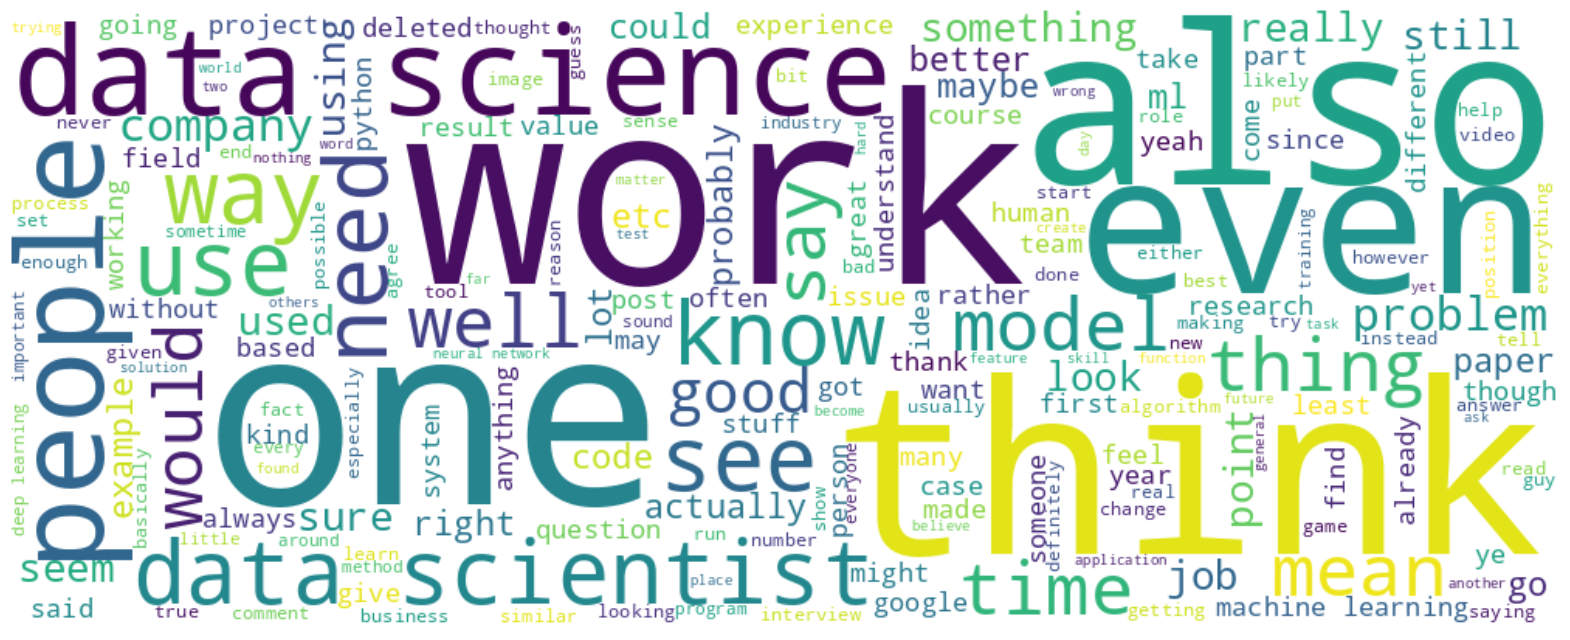

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comments = comments_df['comment']
wordcloud = WordCloud(background_color='white',width=1000,height=400,stopwords=stop_words).generate(" ".join(comments))
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

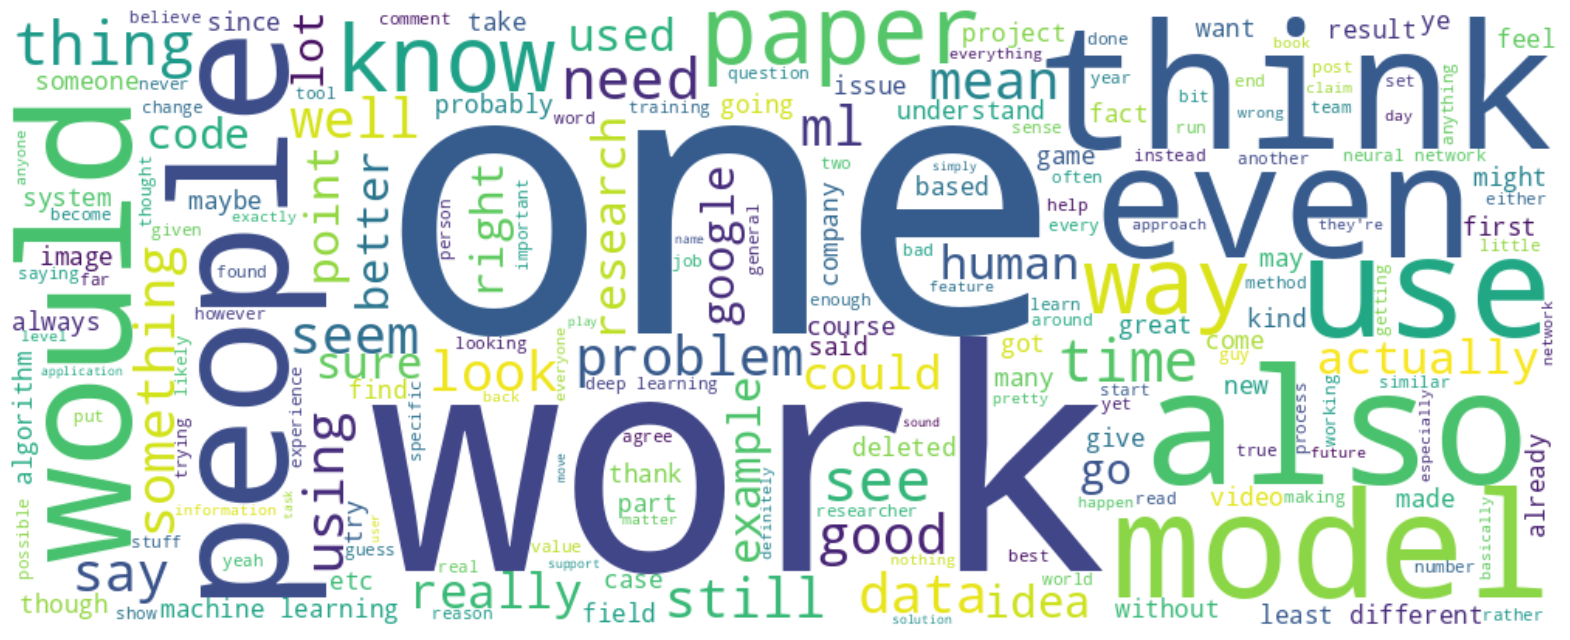

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comments = ml_comments['comment']
wordcloud = WordCloud(background_color='white',width=1000,height=400,stopwords=stop_words).generate(" ".join(comments))
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

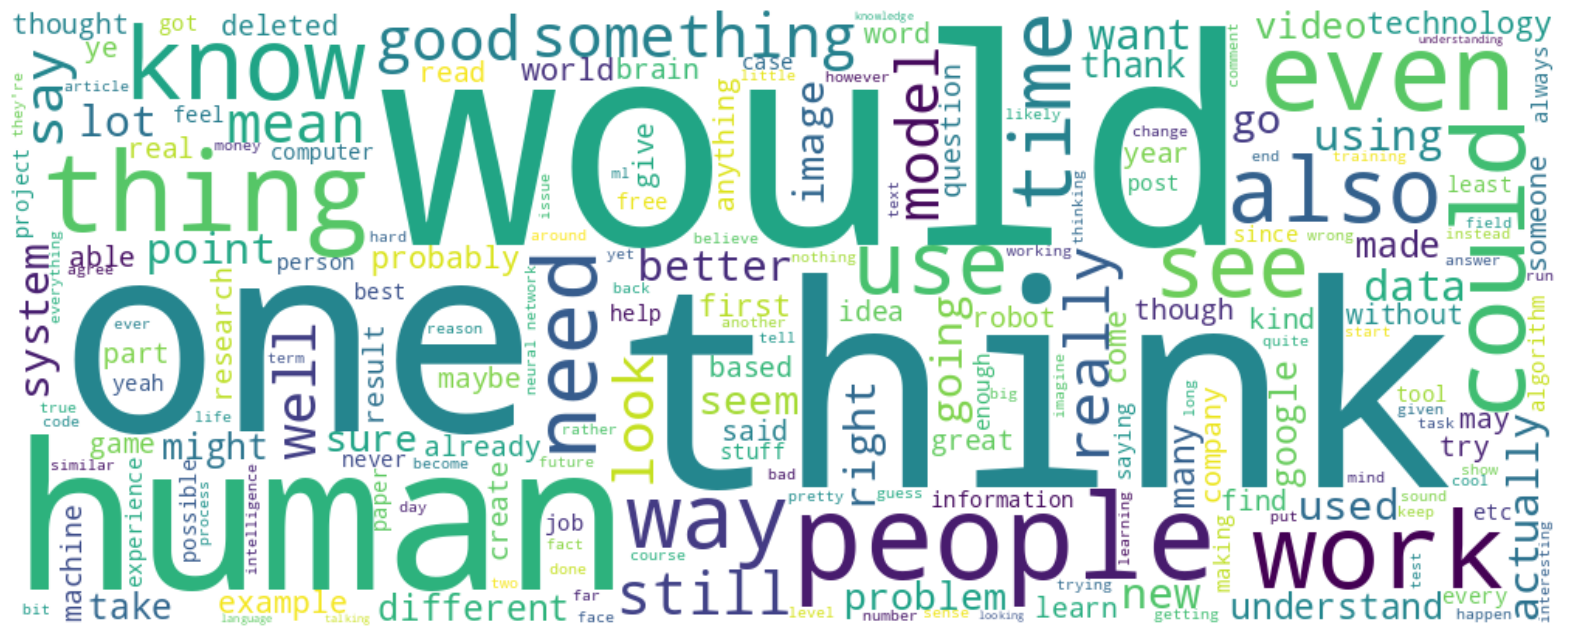

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comments = ai_comments['comment']
wordcloud = WordCloud(background_color='white',width=1000,height=400,stopwords=stop_words).generate(" ".join(comments))
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

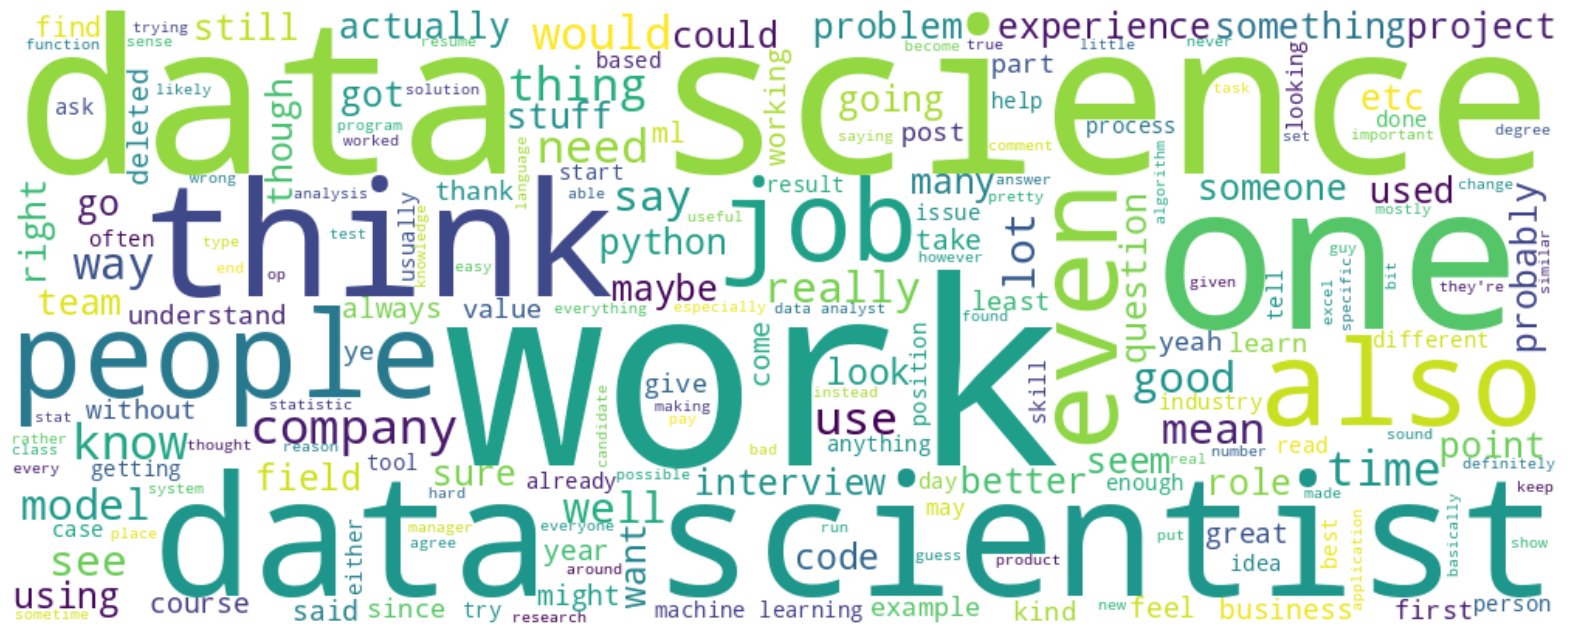

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comments = ds_comments['comment']
wordcloud = WordCloud(background_color='white',width=1000,height=400,stopwords=stop_words).generate(" ".join(comments))
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Getting the most correlated unigrams

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest


tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2, norm='l2', 
                        encoding='latin-1', ngram_range=(1, 1), 
                        stop_words='english')

features = tfidf.fit_transform(comments_df["comment"])#df.comments)
labels = comments_df["subreddit"]
subreddit_classes = labels.unique()
N = 20
for subreddit_class in subreddit_classes:
    features_chi2 = chi2(features, labels == subreddit_class)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    print(f"In {subreddit_class} category: ")
    print(f"Most correlated unigrams:  {' '.join(unigrams[-N:])}")

In MachineLearning category: 
Most correlated unigrams:  statistic business research finish skill experience stats removed excel company interview image python role analyst science scientist job paper data
In datascience category: 
Most correlated unigrams:  manager business video removed skill experience stats excel human image company interview python role analyst paper science scientist job data
In artificial category: 
Most correlated unigrams:  prompt movie cool interview dungeon company python debater technology voice generated scientist job science video artificial intelligence data robot human


Convert classes MachineLearning, artificial, datascience to 0,1,2 respectively

In [ ]:
class_mapping = {'MachineLearning': 0, 'artificial': 1, 'datascience': 2}
comments_df["subreddit"] = comments_df["subreddit"].replace(class_mapping)

In [ ]:
comments_df["subreddit"].head(5)

0    0
1    0
2    0
3    0
4    0
Name: subreddit, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split 
vectorizer =TfidfVectorizer(max_df=0.9)
X = vectorizer.fit_transform(comments_df["comment"])
Y = comments_df["subreddit"]

X_training, X_testing, y_training, y_testing = train_test_split(X, Y, test_size=0.2,random_state =1) 


In [ ]:
!pip install --upgrade scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
train_acc=[]
test_acc=[]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
print('Decison Tree')
model1_dt=DecisionTreeClassifier()
model1_dt.fit(X_training, y_training)
y_pred_test = model1_dt.predict(X_testing)
y_pred_train = model1_dt.predict(X_training)
train_acc.append(accuracy_score(y_training, y_pred_train))
test_acc.append(accuracy_score(y_testing, y_pred_test))

print('Accuracy on Training data: ', accuracy_score(y_training, y_pred_train))
print('Accuracy on Testing data: ', accuracy_score(y_testing, y_pred_test))

cm = confusion_matrix(y_testing, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(include_values=True, cmap='Blues', ax=ax, xticks_rotation='horizontal')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

Decison Tree
Accuracy on Training data:  0.9414990449623867
Accuracy on Testing data:  0.6027513891378383


In [ ]:
from sklearn.ensemble import RandomForestClassifier
print('Random Forest')
model2_rand=RandomForestClassifier()
model2_rand.fit(X_training, y_training)
y_pred_test = model2_rand.predict(X_testing)
y_pred_train = model2_rand.predict(X_training)
train_acc.append(accuracy_score(y_training, y_pred_train))
test_acc.append(accuracy_score(y_testing, y_pred_test))

print('Accuracy on Training data: ', accuracy_score(y_training, y_pred_train))
print('Accuracy on Testing data: ', accuracy_score(y_testing, y_pred_test))

Random Forest
Accuracy on Training data:  0.9414878421751331
Accuracy on Testing data:  0.6745384477504929


In [ ]:
from sklearn.ensemble import RandomForestClassifier
print('Random Forest with n_estimators = 200')
model2_rand=RandomForestClassifier(n_estimators = 200)
model2_rand.fit(X_training, y_training)
y_pred_test = model2_rand.predict(X_testing)
y_pred_train = model2_rand.predict(X_training)
train_acc.append(accuracy_score(y_training, y_pred_train))
test_acc.append(accuracy_score(y_testing, y_pred_test))

print('Accuracy on Training data: ', accuracy_score(y_training, y_pred_train))
print('Accuracy on Testing data: ', accuracy_score(y_testing, y_pred_test))

Random Forest with n_estimators = 200
Accuracy on Training data:  0.9414990449623867
Accuracy on Testing data:  0.6758827746908048


SVM
Accuracy on Training data:  0.8984573675543058
Accuracy on Testing data:  0.7486556730596882


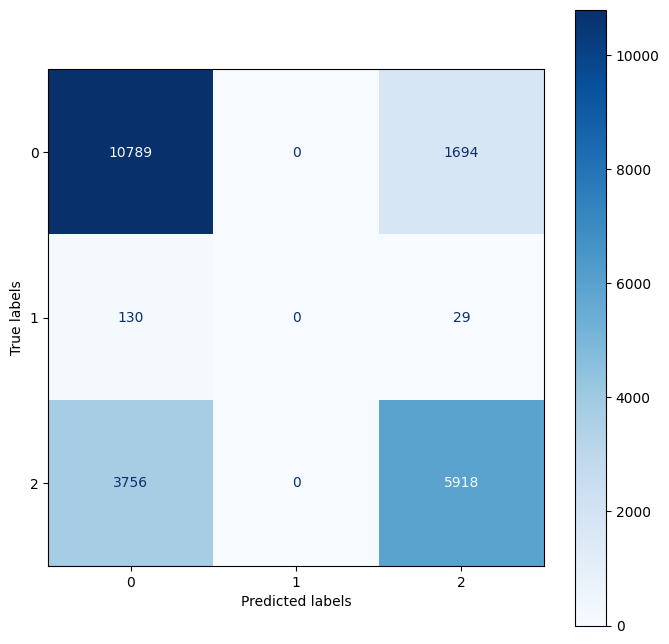

In [ ]:
half_X = X[:X.shape[0] // 2, :]
half_Y = Y[:len(Y)//2]

X_training1, X_testing1, y_training1, y_testing1 = train_test_split(half_X, half_Y, test_size=0.2,random_state =1) 


print('SVM')
model4_svm=SVC()
model4_svm.fit(X_training1, y_training1)
y_pred_test = model4_svm.predict(X_testing1)
y_pred_train = model4_svm.predict(X_training1)
train_acc.append(accuracy_score(y_training1, y_pred_train))
test_acc.append(accuracy_score(y_testing1, y_pred_test))

print('Accuracy on Training data: ', accuracy_score(y_training1, y_pred_train))
print('Accuracy on Testing data: ', accuracy_score(y_testing1, y_pred_test))

cm = confusion_matrix(y_testing1, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(include_values=True, cmap='Blues', ax=ax, xticks_rotation='horizontal')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

KNN
Accuracy on Training data:  0.6495748518423087
Accuracy on Testing data:  0.5849614626277111


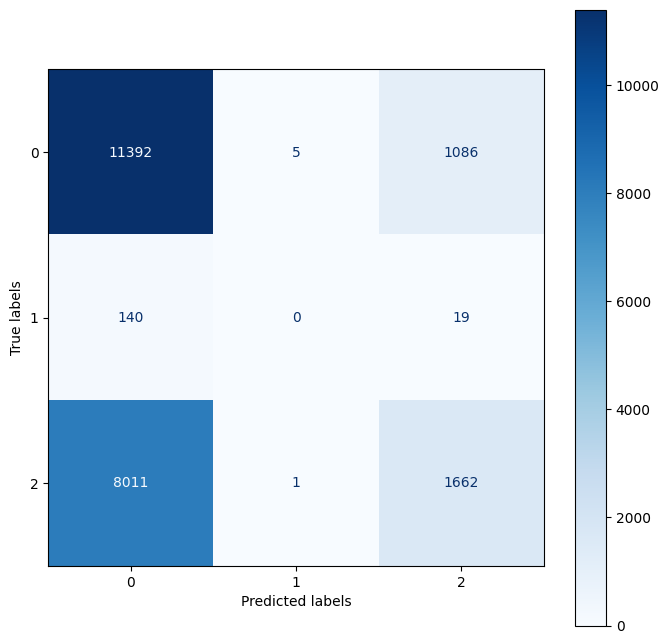

In [ ]:
half_X = X[:X.shape[0] // 2, :]
half_Y = Y[:len(Y)//2]

X_training1, X_testing1, y_training1, y_testing1 = train_test_split(half_X, half_Y, test_size=0.2,random_state =1) 

print('KNN')
model5_knn=KNeighborsClassifier(n_neighbors=3)
model5_knn.fit(X_training1, y_training1)
y_pred_test = model5_knn.predict(X_testing1)
y_pred_train = model5_knn.predict(X_training1)
train_acc.append(accuracy_score(y_training1, y_pred_train))
test_acc.append(accuracy_score(y_testing1, y_pred_test))

print('Accuracy on Training data: ', accuracy_score(y_training1, y_pred_train))
print('Accuracy on Testing data: ', accuracy_score(y_testing1, y_pred_test))

cm = confusion_matrix(y_testing1, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(include_values=True, cmap='Blues', ax=ax, xticks_rotation='horizontal')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

Bagging Classifier
Accuracy on Training data:  0.9214124474169173
Accuracy on Testing data:  0.6457698512278186


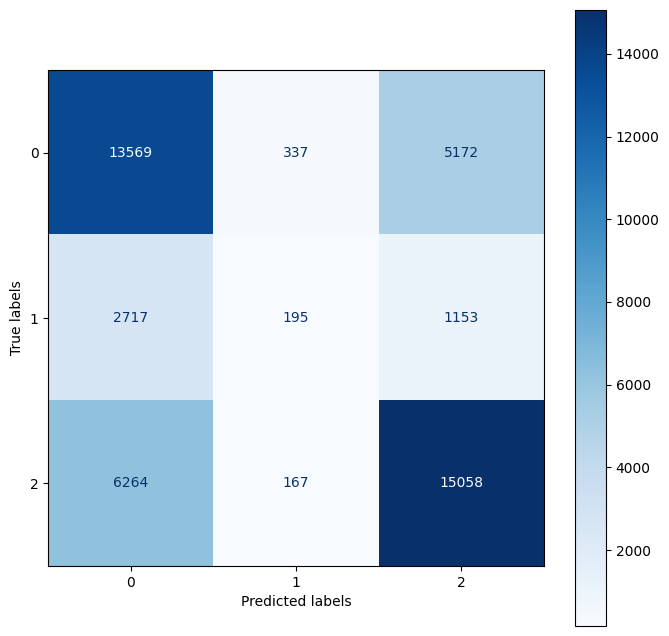

In [ ]:
print('Bagging Classifier')
model6_bc=BaggingClassifier()
model6_bc.fit(X_training, y_training)
y_pred_test = model6_bc.predict(X_testing)
y_pred_train = model6_bc.predict(X_training)
train_acc.append(accuracy_score(y_training, y_pred_train))
test_acc.append(accuracy_score(y_testing, y_pred_test))

print('Accuracy on Training data: ', accuracy_score(y_training, y_pred_train))
print('Accuracy on Testing data: ', accuracy_score(y_testing, y_pred_test))

cm = confusion_matrix(y_testing, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(include_values=True, cmap='Blues', ax=ax, xticks_rotation='horizontal')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

Random Forest
Accuracy on Training data:  0.9414990449623867
Accuracy on Testing data:  0.6781233195913247


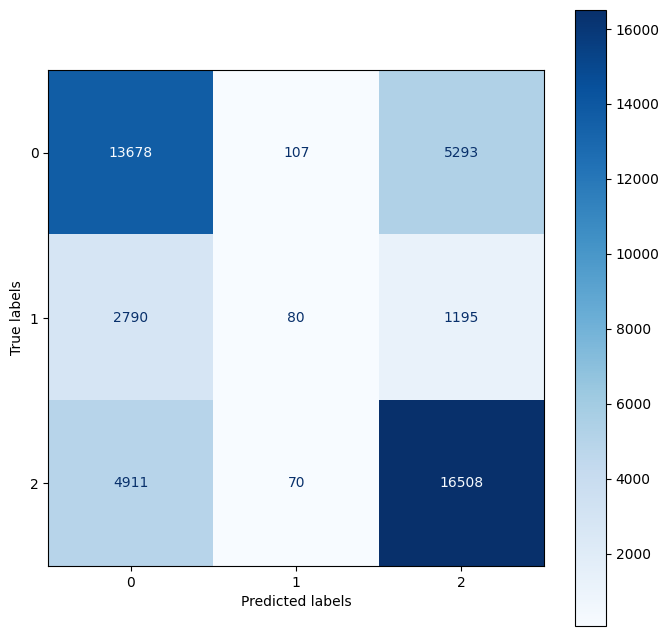

In [ ]:
print('Random Forest')
model7_rf=RandomForestClassifier(n_estimators=400,criterion="gini")
model7_rf.fit(X_training, y_training)
y_pred_test = model7_rf.predict(X_testing)
y_pred_train = model7_rf.predict(X_training)
train_acc.append(accuracy_score(y_training, y_pred_train))
test_acc.append(accuracy_score(y_testing, y_pred_test))

print('Accuracy on Training data: ', accuracy_score(y_training, y_pred_train))
print('Accuracy on Testing data: ', accuracy_score(y_testing, y_pred_test))

cm = confusion_matrix(y_testing, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(include_values=True, cmap='Blues', ax=ax, xticks_rotation='horizontal')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

Comparison of different Random Forest Models

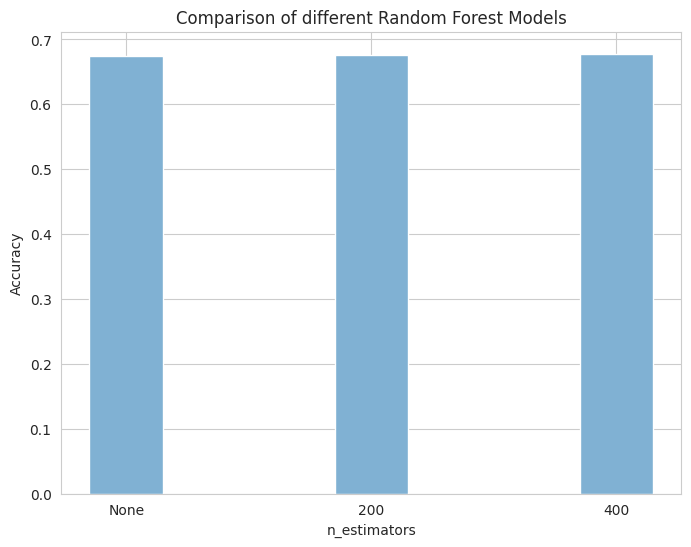

In [ ]:
fig = plt.figure(figsize=(8, 6))
models = ["None","200","400"]
test_acc = [0.674,0.6758,0.678]
sns.set_style('whitegrid')
palette = sns.color_palette('Set3')
plt.bar(models,test_acc,color=palette[4], width=0.3)
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.title('Comparison of different Random Forest Models')
plt.show()

Naive Bayes using alpha = 0.1
Accuracy on Training data:  0.7140320511743322
Accuracy on Testing data:  0.6798709446137301


Naive Bayes using alpha = 0.2
Accuracy on Training data:  0.7112033473928313
Accuracy on Testing data:  0.680543108083886


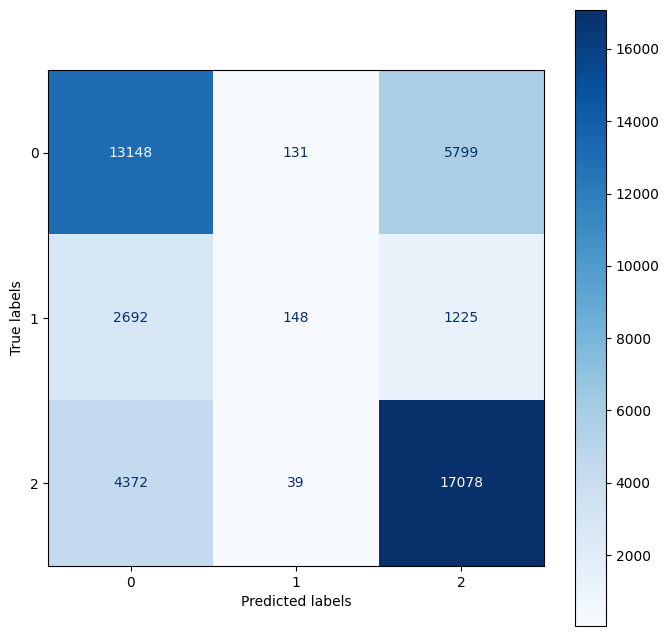

Naive Bayes using alpha = 0.3
Accuracy on Training data:  0.708828356495096
Accuracy on Testing data:  0.680207026348808


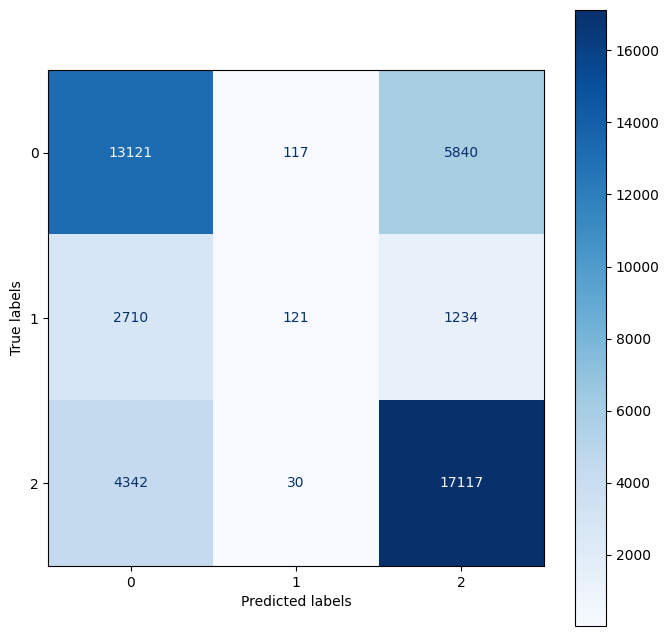

Naive Bayes using alpha = 0.4
Accuracy on Training data:  0.7071983509497163
Accuracy on Testing data:  0.6803414590428393


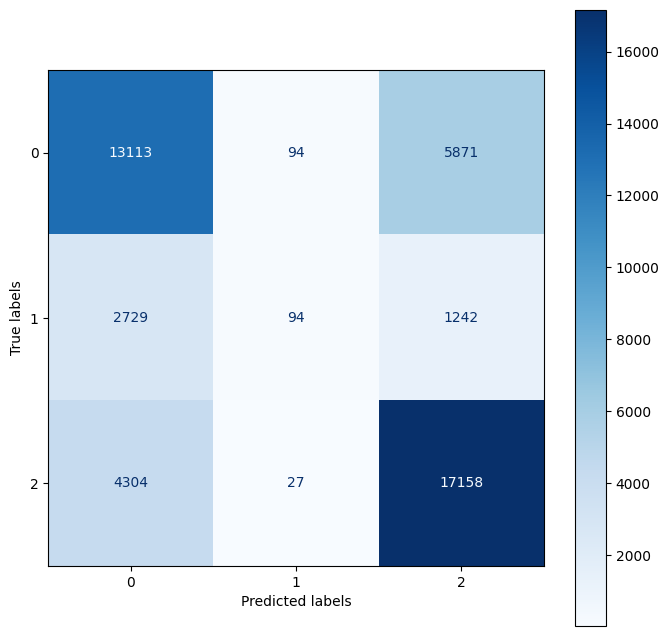

Naive Bayes using alpha = 0.5
Accuracy on Training data:  0.7056747718832446
Accuracy on Testing data:  0.6800725936547768


Naive Bayes using alpha = 1.0
Accuracy on Training data:  0.7010368179603085
Accuracy on Testing data:  0.6802742426958236


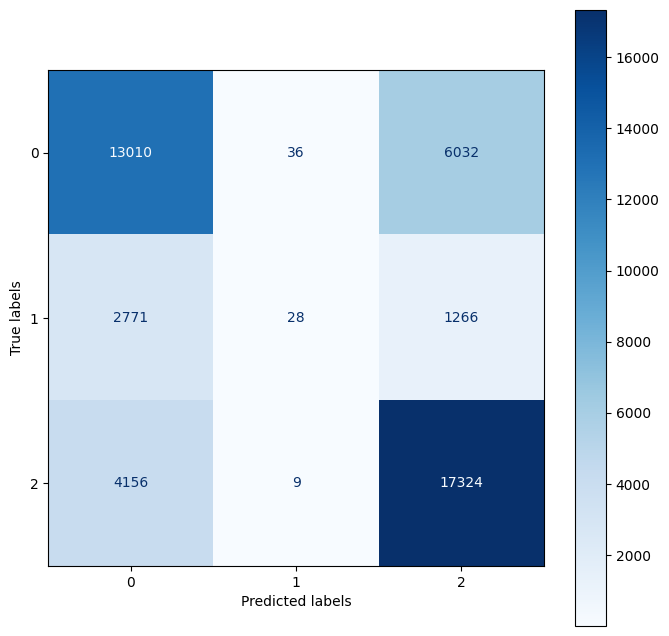

In [ ]:
def NaiveBayes(alpha,totaltime_nb,train_acc_nb,test_acc_nb):
  print(f'Naive Bayes using alpha = {alpha}')
  model8_nb=MultinomialNB(alpha=alpha)
  model8_nb.fit(X_training, y_training)
  y_pred_test = model8_nb.predict(X_testing)
  y_pred_train = model8_nb.predict(X_training)
  train_acc_nb.append(accuracy_score(y_training, y_pred_train))
  test_acc_nb.append(accuracy_score(y_testing, y_pred_test))

  print('Accuracy on Training data: ', accuracy_score(y_training, y_pred_train))
  print('Accuracy on Testing data: ', accuracy_score(y_testing, y_pred_test))
  cm = confusion_matrix(y_testing, y_pred_test)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  fig, ax = plt.subplots(figsize=(8, 8))
  disp.plot(include_values=True, cmap='Blues', ax=ax, xticks_rotation='horizontal')
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  plt.show()
alpha=[0.1,0.2,0.3,0.4,0.5,1.0]
totaltime_nb=[]
train_acc_nb=[]
test_acc_nb=[]
for i in alpha:
    NaiveBayes(i,totaltime_nb,train_acc_nb,test_acc_nb)

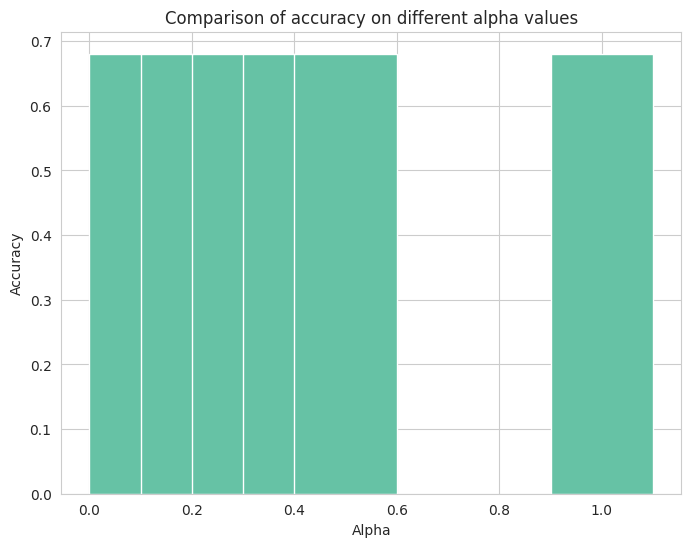

In [ ]:
fig = plt.figure(figsize=(8, 6))
alpha = [0.1,0.2,0.3,0.4,0.5,1.0]
test_acc = [0.6798,0.6805,0.6802,0.6803,0.68,0.6802]
sns.set_style('whitegrid')
palette = sns.color_palette('Set2')
plt.bar(alpha,test_acc,color=palette[0], width=0.2)
plt.ylabel('Accuracy')
plt.xlabel('Alpha')
plt.title('Comparison of accuracy on different alpha values')
plt.show()

Logistic Regression using penalty = none


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy on Training data:  0.7615094635545324
Accuracy on Testing data:  0.6592355260799426


Logistic Regression using penalty = l1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy on Training data:  0.7084978742711187
Accuracy on Testing data:  0.6846433052518373


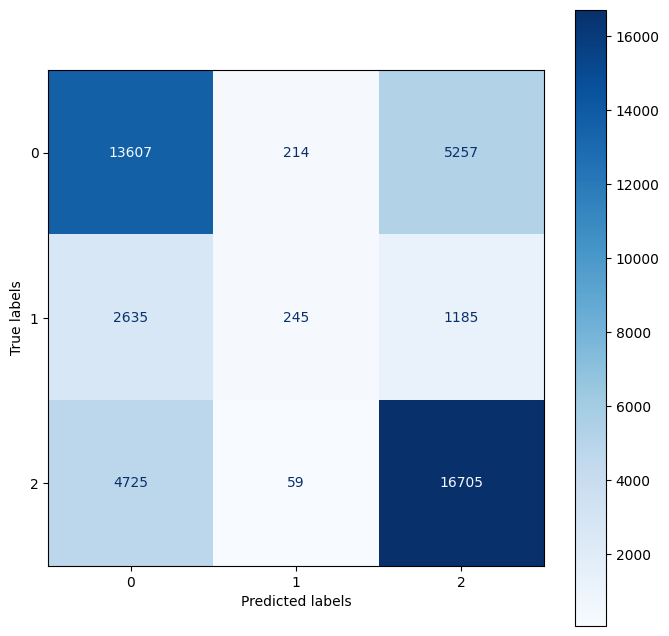

Logistic Regression using penalty = l2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on Training data:  0.7151243229315454
Accuracy on Testing data:  0.6864133357232479


In [ ]:
from sklearn.linear_model import LogisticRegression

def Logistic_Regression(penalty,train_acc_lg,test_acc_lg,solver):
  print(f'Logistic Regression using penalty = {penalty}')
  model9_lg=LogisticRegression(penalty=penalty,solver=solver)
  model9_lg.fit(X_training, y_training)
  y_pred_test = model9_lg.predict(X_testing)
  y_pred_train = model9_lg.predict(X_training)
  train_acc_lg.append(accuracy_score(y_training, y_pred_train))
  test_acc_lg.append(accuracy_score(y_testing, y_pred_test))

  print('Accuracy on Training data: ', accuracy_score(y_training, y_pred_train))
  print('Accuracy on Testing data: ', accuracy_score(y_testing, y_pred_test))

  cm = confusion_matrix(y_testing, y_pred_test)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  fig, ax = plt.subplots(figsize=(8, 8))
  disp.plot(include_values=True, cmap='Blues', ax=ax, xticks_rotation='horizontal')
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  plt.show()

penalty = ['none', 'l1', 'l2']
solver = "saga"
test_acc_lg=[]
for i in penalty:
    if i == "l2":
      solver = "lbfgs"
    Logistic_Regression(i,train_acc_lg,test_acc_lg,solver)



In [ ]:
fig = plt.figure(figsize=(8, 6))
penalty = ["None","l1","l2"]
test_acc=[0.659,0.684, 0.686]
sns.set_style('whitegrid')
palette = sns.color_palette('Set2')
plt.bar(penalty,test_acc,color=palette[6], width=0.2)
plt.ylabel('Accuracy')
plt.xlabel('Penalty')
plt.title('Comparison of accuracy on different penalty values')
plt.show()

Ridge Classifier
Accuracy on Training data:  0.730819427873655
Accuracy on Testing data:  0.6819322459222082


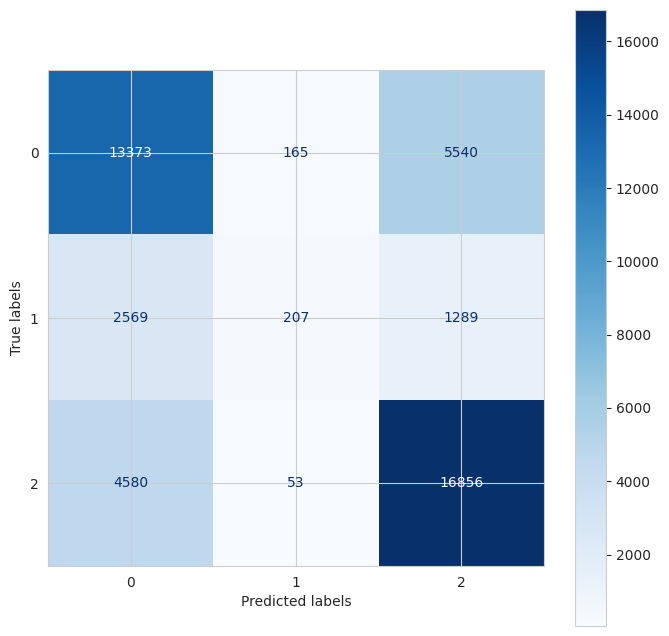

In [ ]:
print('Ridge Classifier')
model10_rc=RidgeClassifier()
model10_rc.fit(X_training, y_training)
y_pred_test = model10_rc.predict(X_testing)
y_pred_train = model10_rc.predict(X_training)
train_acc.append(accuracy_score(y_training, y_pred_train))
test_acc.append(accuracy_score(y_testing, y_pred_test))

print('Accuracy on Training data: ', accuracy_score(y_training, y_pred_train))
print('Accuracy on Testing data: ', accuracy_score(y_testing, y_pred_test))

cm = confusion_matrix(y_testing, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(include_values=True, cmap='Blues', ax=ax, xticks_rotation='horizontal')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

# Comprison of all the models

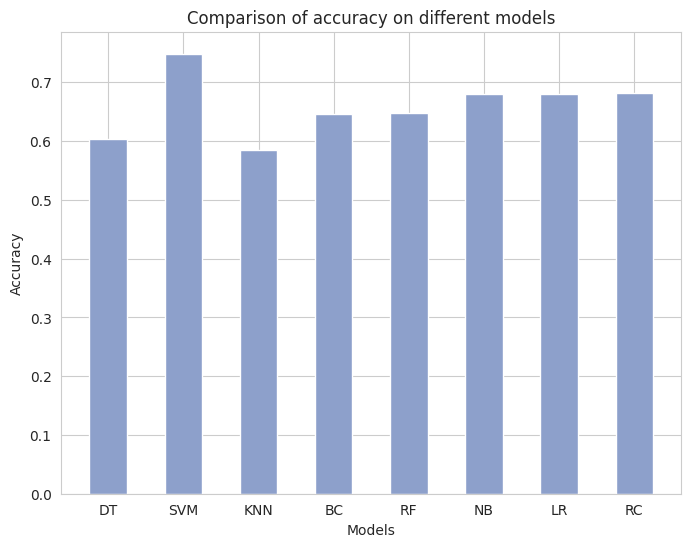

In [ ]:
fig = plt.figure(figsize=(8, 6))
models = ["DT","SVM","KNN","BC","RF","NB","LR","RC"]
test_acc=[0.6027,0.7486, 0.5849,0.6457,0.648,0.68,0.68,0.682]
sns.set_style('whitegrid')
palette = sns.color_palette('Set2')
plt.bar(models,test_acc,color=palette[2], width=0.5)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Comparison of accuracy on different models')
plt.show()